In [1]:
#!pip3 install torch
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2020-07-18 18:36:08--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.229.170.137, 54.236.185.76, 34.225.3.211, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.229.170.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  12.8MB/s    in 1.0s    

2020-07-18 18:36:11 (12.8 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [2]:
import numpy as np # linear algebra
%tensorflow_version 1.x
import tensorflow as tf
import torch
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
#MinMaxScalar is used to normalize the value before training
#is used to deal with the data after train and split as data will be in form of aray for training and testing.
from keras.models import Sequential
#keras has 2 models one is functional and another is sequential
from keras.layers import Dense
#Dense layer is the output layer
from keras.layers import LSTM
#library used to calculate the mean square error. For classification accuracy is calculated and for regression mean square error is calculated
import math, os
from sklearn.metrics import mean_squared_error

TensorFlow 1.x selected.


Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!ls /content/drive

'My Drive'


In [5]:
#%cd /content/drive/My\ Drive/Mount

In [6]:
!ls

drive  ngrok  ngrok-stable-linux-amd64.zip  sample_data


In [7]:
!pip install kaggle

In [9]:
from google.colab import files
uploaded = files.upload()

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [10]:
!kaggle competitions download -c LANL-Earthquake-prediction

  0% 0.00/324k [00:00<?, ?B/s]
100% 324k/324k [00:00<00:00, 47.4MB/s]
  0% 0.00/330k [00:00<?, ?B/s]
100% 330k/330k [00:00<00:00, 100MB/s]
  0% 0.00/329k [00:00<?, ?B/s]
100% 329k/329k [00:00<00:00, 108MB/s]
  0% 0.00/316k [00:00<?, ?B/s]
100% 316k/316k [00:00<00:00, 100MB/s]
  0% 0.00/332k [00:00<?, ?B/s]
100% 332k/332k [00:00<00:00, 107MB/s]
  0% 0.00/319k [00:00<?, ?B/s]
100% 319k/319k [00:00<00:00, 107MB/s]
  0% 0.00/329k [00:00<?, ?B/s]
100% 329k/329k [00:00<00:00, 41.9MB/s]
  0% 0.00/320k [00:00<?, ?B/s]
100% 320k/320k [00:00<00:00, 105MB/s]
  0% 0.00/320k [00:00<?, ?B/s]
100% 320k/320k [00:00<00:00, 103MB/s]
  0% 0.00/324k [00:00<?, ?B/s]
100% 324k/324k [00:00<00:00, 101MB/s]
  0% 0.00/336k [00:00<?, ?B/s]
100% 336k/336k [00:00<00:00, 105MB/s]
  0% 0.00/312k [00:00<?, ?B/s]
100% 312k/312k [00:00<00:00, 104MB/s]
  0% 0.00/315k [00:00<?, ?B/s]
100% 315k/315k [00:00<00:00, 105MB/s]
  0% 0.00/321k [00:00<?, ?B/s]
100% 321k/321k [00:00<00:00, 109MB/s]
  0% 0.00/325k [00:00<?, ?B/s]
1

In [11]:
!ls

drive			      seg_00184e.csv  seg_00648a.csv  seg_00e5f7.csv
ngrok			      seg_003339.csv  seg_006e4a.csv  seg_00f3b9.csv
ngrok-stable-linux-amd64.zip  seg_0042cc.csv  seg_007a37.csv  seg_010eab.csv
sample_data		      seg_004314.csv  seg_00a37e.csv  seg_0125d9.csv
sample_submission.csv	      seg_004cd2.csv  seg_00be11.csv  train.csv.zip
seg_00030f.csv		      seg_004ee5.csv  seg_00c35b.csv
seg_0012b5.csv		      seg_004f1f.csv  seg_00cc91.csv


In [12]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
from keras.callbacks import *
filepath = "/content/drive/My Drive/Epochs/epochs:{epoch:03d}.hdf5"
checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=False , mode='max')
callbacks_list = [checkpoint]


In [ ]:
get_ipython().system_raw('./ngrok http 6006 &')

In [14]:
import matplotlib.pyplot as plt

In [281]:
train = pd.read_csv('train.csv',nrows=5500000,dtype={'acoustic_data': np.int16,'time_to_failure': np.float64})

In [282]:
#train.drop(train.head(1000000).index, inplace=True)

In [283]:
train.shape

(5500000, 2)

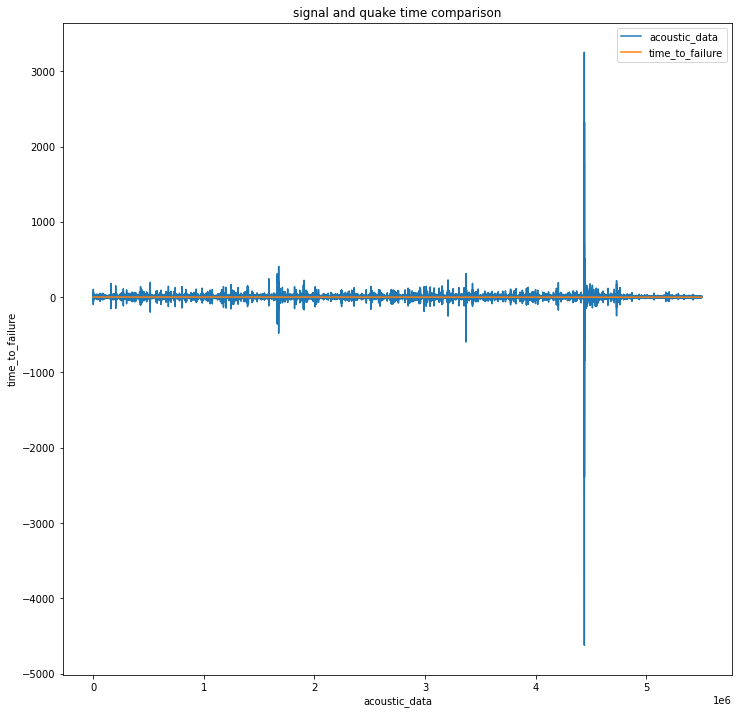

In [284]:
#how data was before
train.plot(kind = 'line', figsize = (12,12))
plt.title('signal and quake time comparison')
plt.xlabel('acoustic_data')
plt.ylabel('time_to_failure')
plt.show()

In [285]:
train.head(4)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691


In [286]:
train.isnull().values.any() 


False

In [287]:
train.values.max()

3252.0

In [288]:
train.values.min()

-4621.0

In [289]:
train.shape

(5500000, 2)

In [290]:
scaler = MinMaxScaler(feature_range=(-1 , 1))
data = scaler.fit_transform(train)
target = train['time_to_failure']

In [291]:
target.head(3)

0    1.4691
1    1.4691
2    1.4691
Name: time_to_failure, dtype: float64

In [292]:
data

array([[ 0.17693382,  1.        ],
       [ 0.17540963,  1.        ],
       [ 0.17591769,  1.        ],
       ...,
       [ 0.17540963, -1.        ],
       [ 0.17540963, -1.        ],
       [ 0.17413946, -1.        ]])

In [293]:
#module for training and splitting
from sklearn.model_selection import train_test_split
#
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)

In [294]:
print(X_train,(X_train.shape[0],1,X_train.shape[1]))

[[ 0.17591769 -0.46953406]
 [ 0.17617173 -0.31152964]
 [ 0.17388543 -0.21613483]
 ...
 [ 0.17464753  0.19526238]
 [ 0.17490156  0.46056748]
 [ 0.17413946 -0.63636366]] (4125000, 1, 2)


In [295]:
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
#converting the shape in the way machine will take for training
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

Shape of X_train: (4125000, 2)
Shape of X_test: (1375000, 2)
Shape of y_train: (4125000,)
Shape of y_test: (1375000,)


In [296]:
X_train.shape

(4125000, 1, 2)

In [297]:
model = Sequential()
#time stamp on the first time step you produce output1, h0, on the second time step you produce output2 and so on.
#how many steps back in time backprop uses when calculating gradients for weight updates
# 2 columns 
model.add(LSTM(48, input_shape=(1, 2)))
#output layer contains 1 neuron to predict the output
model.add(Dense(1))
#as the data is continous, hence loss function is mean_squared_error
model.compile(loss='mean_squared_error', optimizer='sgd')

In [298]:
#
#model.fit(X_train, y_train, epochs=5, batch_size=1,  verbose=1,callbacks=callbacks_list)

In [299]:
#model_save_name = 'FYP FINAL.pt'
#path = F"/content/drive/My Drive/Model/{model_save_name}" 
#torch.save(model.load_weights('/content/drive/My Drive/Mount/epochs:009.hdf5'), path)

In [300]:
model.load_weights('/content/drive/My Drive/model.h5')
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 48)                9792      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 49        
Total params: 9,841
Trainable params: 9,841
Non-trainable params: 0
_________________________________________________________________


In [301]:
Predict = model.predict(X_test)

In [302]:
testScore = math.sqrt(mean_squared_error(y_test, Predict))
print('Root mean square error Test Score: %.2f RMSE' % (testScore))

Root mean square error Test Score: 0.88 RMSE


In [303]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 990000000000000000000000000000000000000000000000000000000000000000000000000

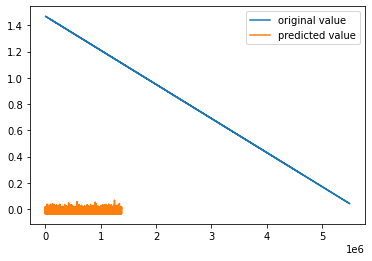

In [304]:
plt.plot(y_test)
plt.plot(Predict)
plt.legend(['original value','predicted value'],loc='upper right')
plt.show()